In [2]:
import numpy as np
import pandas as pd


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor


In [6]:
df=pd.read_csv('/content/BostonHousing.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [11]:
x=df.drop('price',axis=1)

In [12]:
y=df['price']

In [13]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [14]:
y

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [16]:
correlation=df.corr()


<Axes: >

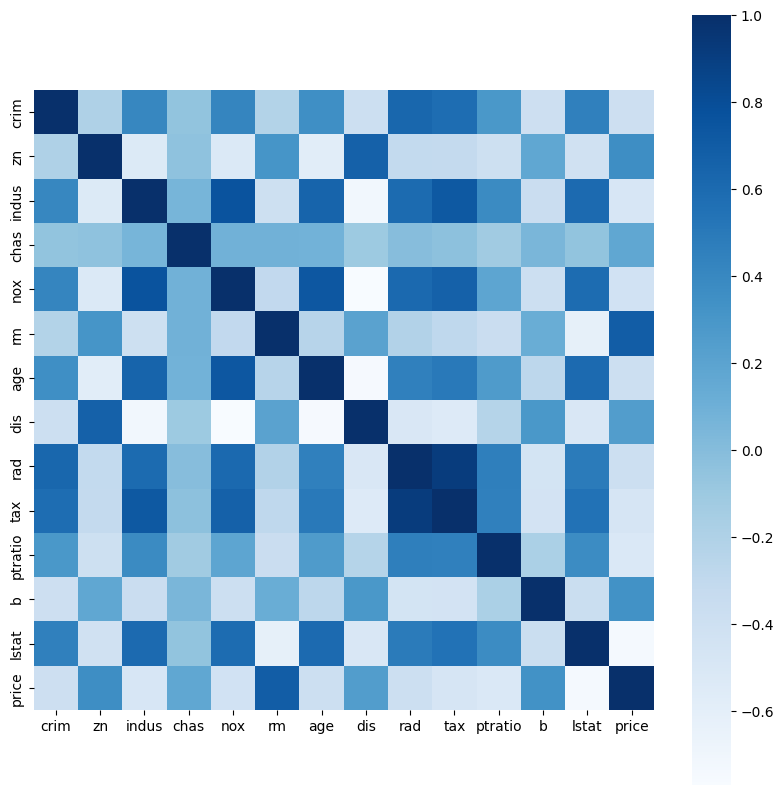

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot_kws={'size':8},cmap='Blues')

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [22]:
print(x.shape,x_train.shape,x_test.shape)

(506, 13) (404, 13) (102, 13)


In [23]:
model=LinearRegression()

In [24]:
model.fit(x_train,y_train)

LinearRegression()

In [26]:
model_prediction=model.predict(x_train)

In [27]:
model_prediction

array([25.01156658, 23.20086342, 19.63206629, 30.79723661, 13.29598163,
       12.35655178, 21.17619058, 11.52105413, 13.48284934, 23.29619143,
       16.67181245, 11.9640623 , 32.53526883, 25.38737924, 29.80188665,
       19.51269487, 24.14966495, 24.10079632, 30.6933436 , 19.14366521,
       33.53309203,  3.93459665, 41.11203484, 24.48533152, 20.09948308,
       23.54618062, 21.50057915, 25.02443747, 22.39275602, 33.67942244,
       25.49286716,  8.07877994, 17.45164918, 10.02711469, 20.30483806,
       12.97802751, 18.36662544, 25.4320083 , 14.00655745, 17.89557148,
       24.77620977, 28.90131112, 17.27439484, 23.1865498 , 12.62489379,
       11.32274928, 27.4978866 , 19.49269776, 44.80229099, 16.9529603 ,
       22.44602306, 33.66680303, 20.2706101 , 20.70205114, 20.98558754,
       21.63228494, 27.05322369, 33.11940621, 25.61757987, 32.73314444,
       20.91920151, 41.11899411, 15.32086807,  8.42394611, 22.84480968,
       13.72210624, 28.60744627, 17.09291577, 26.76454185, 39.14

In [29]:
score1=metrics.r2_score(y_train,model_prediction)

In [32]:
print(score1)

0.7285831776605591


In [33]:
score2=metrics.mean_absolute_error(y_train,model_prediction)

In [34]:
score2

3.3844575399167973

In [37]:
model2=XGBRegressor()

In [39]:
model2.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [42]:
model_prediction=model2.predict(x_train)

In [45]:
score3=metrics.r2_score(y_train,model_prediction)

In [46]:
print(score3)

0.9999980039471451


In [47]:
score4=metrics.mean_absolute_error(y_train,model_prediction)

In [48]:
print(score4)

0.0091330346494618


In [50]:
input=np.array([[0.02731,	0.0,	7.07	,0,	0.469,	6.421,	78.9,	4.9671,	2	,242,	17.8,	396.90,	9.14]])

In [54]:
 model.predict(input)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25.38194186])

In [55]:
model2.predict(input)

array([22.86288], dtype=float32)